**Ch26-29: 聚类，K-Means与EM！！**

Source: 
[数据分析实战 45 讲](https://time.geekbang.org/column/intro/100021701?tab=intro)

---

## K-Means （图像处理看第二个代码块！！很多干货！一定要看注释！！！）

* 算了我猜测之后绝对不会去看下面注释的因为某个极懒的人只喜欢看Markdown捏。那就总结一下好了-_-，关于图像：

    1. `PIL.image`的常见函数与image的常见方法及如何遍历（用到了`.open`/`.new`/`.fromarray`函数和实例化对象后的`.size`/`.getpixel`/`.putpixel`/`.save`方法）；一点点的skimage。
 
    2. 灰度值、通道值（显示出彩色就是因为RGB三个通道值**不同**！！例子见底下输出的K-Means中心点的三个channel数值）、不同图像mode（补充：如果想要的是PNG的话不是'RGB' mode而是'RGBA'，多的那个是透明底！！小画家去哪了Q_Q ）

K代表的是K类，Means代表的是中心，可以理解这个算法的本质是确定K类的中心点，当找到了这些中心点，也就完成了聚类（无监督学习；要用到sklearn的cluster这个module (这里再复习一下module/package区别： a module is a single Python file, a package is a directory of Python modules containing an additional `__init__.py`)。sklearn这个library一共能实现的功能有分类、聚类、回归、降维、模型选择、预处理等等，发现到今天已经覆盖了不少了。

* 区分KNN与K-Means：一个是分类（有监督学习，给定labels）一个是聚类（无监督学习）。同时，一个K值代表跟相邻的K个邻居取相同的分类类别，另一个代表你要把数据聚成K个类。其实好容易区分哇。

**K-Means:**

1. 从数据集里随机抽取K个数据点作为初始的K个类的中心点（回忆，每个样本点都可看作是该**空间**的一个向量）

2. 将每个样本点分配到**距离**最近的类，然后重新计算这K个类每个的中心点（比如在现在这个类里面取这堆features取值的**均值**）。看到‘距离’，想一定要经过数据规范化。

3. 一直迭代第二步，直到类不发生变化，或者也可以设置最大迭代次数，到这个次数就结束聚类。

```python
KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto') 
```
* `n_clusters`: 这就是K取值，好像KNN里面那个K取值的参数，但是像下例你想要聚成n个类的就要手动把参数设为n，不能用他的default。

* `init`, `n_init`：最开始选择的K个中心点的方式（默认是优化过的k-means++方式）和次数（在这些initial attempts先找效果最好的，再进行后续对样本点的分配等等，使程序快速收敛）。

* 创建好KMeans对象以后，它的方法也是fit和predict，后者输出clustering结果。

* ”无监督“另一种理解方式是没有实际的结果可以进行比对，所以结果评估不像分类模型的分类准确率一样直观，但是也有，比如`calinski_harabaz_score`。指标分数越高，代表聚类效果越好，**也就是相同类中的差异性小，不同类之间的差异性大。**
    
    * 其实它还有一种不抽象的理解方式：**fit跟predict都能合并成`fit_predict()`一个啊**，毕竟传入的特征矩阵是一模一样的，没有target这种基于先验的结果经验。

* 另外聚类算法也可以作为其他数据挖掘算法的预处理阶段，这样我们就可以将数据进行降维了。

In [4]:
# 好了要开写了。顺便感觉这家的小料味道挺淡的，对于本身就浓浓香香的小青团和斑斓冻尤为明显，但是又得凑起送费。其实不同类型的小料/店也可以聚类。
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

dataset = pd.read_csv("L26上课数据.csv",encoding='gbk')
print(type(dataset))
features = dataset[["2019年国际排名","2018世界杯","2015亚洲杯"]]
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3)  # 目标就是聚成三个!!!类
kmeans.fit(features)
output_clusters = kmeans.predict(features)

# resulted_data = pd.concat((dataset,output_clusters),axis=1) 
        # 报错，因为predict出来的又双..是个ndarray需转为DataFrame，看下行咋转！！！
resulted_data = pd.concat((dataset,pd.DataFrame(output_clusters)),axis=1) # 方便又实用哇
resulted_data.rename({0:'聚类'},axis=1,inplace=True)  # concat出来的第二个dataframe索引为0，重新命名
# 还想再碎碎念一句这个讨厌的DataFrame方法的axis参数。这里又变成0是行（或axis='index', default) 1是列了。
print(resulted_data)

<class 'pandas.core.frame.DataFrame'>
        国家  2019年国际排名  2018世界杯  2015亚洲杯  聚类
0       中国         73       40        7   2
1       日本         60       15        5   1
2       韩国         61       19        2   1
3       伊朗         34       18        6   1
4       沙特         67       26       10   2
5      伊拉克         91       40        4   2
6      卡塔尔        101       40       13   0
7      阿联酋         81       40        6   2
8   乌兹别克斯坦         88       40        8   2
9       泰国        122       40       17   0
10      越南        102       50       17   0
11      阿曼         87       50       12   0
12      巴林        116       50       11   0
13      朝鲜        110       50       14   0
14      印尼        164       50       17   0
15      澳洲         40       30        1   1
16     叙利亚         76       40       17   0
17      约旦        118       50        9   0
18     科威特        160       50       15   0
19    巴勒斯坦         96       50       16   0


聚类中心颜色值:
 [[ 20  49  87]
 [136 153 172]
 [  5  17  32]
 [213 219 226]
 [  0   1   4]
 [ 72  99 133]
 [172 184 198]
 [ 42  72 111]
 [ 99 121 149]
 [ 20  29  41]
 [  2  10  21]
 [ 13  36  65]
 [191 201 211]
 [119 138 162]
 [  6  24  47]
 [155 168 185]] 
你别说16个类其实就已经非常还原了
(100, 177)


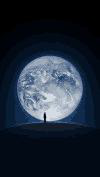

In [6]:
# 使用K-Means聚类的图像分割任务： 重点在于图像处理！！！！！！！！！！！！！！！！！！
# 用模型计算的过程在sklearn封装下中就是几行代码，大部分的工作还是在预处理和后处理上。
# 预处理是将图像进行加载，数据规范化。后处理是对聚类后的结果进行反变换，把聚类得到的一维ndarray转换为灰度值填充到一个图像上。

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import PIL.Image as image 
# PIL；这里用到了.open/.new/.fromarray函数和实例化对象后的.size/.getpixel/.putpixel/.save方法

# 这个加载图片信息的过程是我觉得一定要重点掌握的
def load_data(path):
    with open (path,'rb') as f:
        data = []
        img = image.open(f) # 这里就是用到那个PIL处理图片。注意这个图像文件要'open'两次
        width, height = img.size # 一定要熟悉这种给多个变量赋值的语句
        # 得到每个pixel的三个通道值(R,G,B)(输出0-255)！！！！注意看！！！！！！！！
        for x in range(width):
            for y in range(height):
                c1,c2,c3 = img.getpixel((x,y)) # getpixel()方法内的(x,y)就表示这个pixel的坐标
                data.append([c1,c2,c3]) # 每一个元素又是一个小列表
    return np.asarray(data),width,height # 把append完的列表转化为ndarray; np.array与np.asarray区别在于前者会copy对象
    # 顺带着讲讲np.mat()生成的numpy matrix数据类型和np.array()生成ndarray的区别：
    # 前者是把一行当成一个元素，索引的时候是用m[0,1]取第一行的第二个数据！！不能m[0][1]
    # np.dot无论数据是array或matrix都表示矩阵相乘；np.multiply无论数据是array或matrix都表示element-wise那样子相乘
    # 但是！！！用*符号相乘array是Hadamard，而matrix是常规矩阵乘法
input_img,width,height = load_data("L27上课数据.jpg")
scaler = MinMaxScaler()  # 别忘了这是K-Means是基于距离必须scale啊（不然某个特征有可能overwhelm了）
input_img = scaler.fit_transform(input_img)


# 用K-Means先聚成两类; 反正输入值一样我要直接在这里用fit_predict()
kmeans_2 = KMeans(n_clusters=2)
kmeans_16 = KMeans(n_clusters=16) # for RGB
clusters = kmeans_2.fit_predict(input_img)
clusters = clusters.reshape([width,height])  # 将图像clustering结果转化为图像尺寸的矩阵，之后再后处理变回通道值
clusters2 = kmeans_16.fit_predict(input_img)
clusters2 = clusters2.reshape([width,height])

# 创建个新画布，再把这些后处理完变回通道值（只有两种，毕竟设定聚为2簇）的输出逐个pixel给它们填充回去
clustered_pic1 = image.new("L",(width,height)) # mode为“L”：灰度
clustered_pic2 = image.new("RGB",(width,height)) # mode为三通道red green blue
for x in range(width):
    for y in range(height): # 跟刚才getpixel时候一样，填充的时候也逐个坐标遍历
        clustered_pic1.putpixel((x,y),int(256/(clusters[x][y]+1))-1) 
        # 这里后处理：把聚类结果0/1变成灰度值(单通道！"L",且坐标后面只传了一个参数）。分类为0的灰度值为255，为1的灰度值为127。

        
        # clustered_pic2 = clustered_pic2.putpixel((x,y),(int(256/(clusters2[x][y]+1))-1,int(256/(clusters2[x][y]+1))-1,int(256/(clusters2[x][y]+1))-1))
                # 这行出现的两个问题：1. putpixel是个inplace方法，所以要这样赋值的话return的是None啊啊；2.见下

# 三个通道值拿括号括起来写成三元组形式！！就像坐标是二元组一样！
# 一定注意！！！！！
# 如果每个通道的灰度值都是根据聚类标签计算得到的相同数值，那么合成的RGB图像实际上就是**灰度**图像，因为三个通道值相同，无法显示出彩色！！！

# 要生成彩色图像，可以直接使用K-Means聚类后得到的每个中心点（是一个RGB三通道值的三元组嘛，(c1,c2,c3)，这个空间就是三个通道）去找kmeans模型的中心点**三个**通道值的话，
# 可以显示出原图但是经过聚类压缩后的图像
means_c123 = scaler.inverse_transform(kmeans_16.cluster_centers_).astype(int)
print("聚类中心颜色值:\n", means_c123,"\n你别说16个类其实就已经非常还原了")
# 之前我们训练模型前把原本（0-255）的通道值归一化过，现在用同一**已经fit过了**的scaler反变换，还原中心点通道值
for x in range(width):
    for y in range(height):
        c1,c2,c3 = means_c123[clusters2[x][y]]
        clustered_pic2.putpixel((x, y), (c1,c2,c3))
                

# clustered_pic1.save("L27ClusteredImageL.jpg","JPEG")
# clustered_pic2.save("L27ClusteredImageRGB.jpg","JPEG")
print(clustered_pic1.size)
image.open("L27ClusteredImageRGB.jpg")


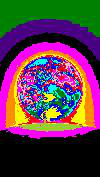

In [10]:
# 要生成彩色图像，还想使用那个模型输出的每个点都一样都不分通道值的聚类标签，可以用skimage的label2rgb()将聚类label转化为不同的颜色
# 回忆聚类过程，最后每次那个输出的label名(0-15)都是随机的，所以再训练一次上面代码块的模型再predict一次label再变一次，下图颜色也变

from skimage import color
# 将聚类标识矩阵转化为不同颜色的矩阵，这里乘255又是手动反归一化了没用scaler的inverse_transform
label_color = (color.label2rgb(clusters2)*255).astype(np.uint8)  # uint8为无符号整数，fromarray()必须输入uint8类型
label_color = label_color.transpose(1,0,2)  # 转置过来，要不然是倒着的，好像是因为reshape先行后列的逻辑什么的不一样还是怎么着
clustered_pic3 = image.fromarray(label_color)
# 这个fromarray()函数最终效果跟上文用的.putpixel+逐像素遍历效果相同。但很显然他可以批量操作效率高，避免循环遍历

# clustered_pic3.save("L27ClusteredImageRGB_but_weird.jpg","JPEG")
image.open("L27ClusteredImageRGB_but_weird.jpg")

# EM Clustering: A Framework

又是逝去的生竞回忆 -_- 其实也不完全，生竞里面也就只是背了这几个名词。但我现在感觉更resonate的其实是花书粗略学完GMM以后这里对隐变量的进一步理解。

---

EM：Expectation-Maximization is an iterative algorithm for **maximum likelihood estimation (MLE)** in models with latent variables (unobserved variables -> **cluster assignments**).

> Adjustment basis: Parameters are updated based on the **weighted average** of data points, where weights are the **probabilities assigned from the E-step.**
> In the EM algorithm, "maximizing the likelihood" refers to maximizing the probability of observing the data (the actual dataset you have) given the model parameters. 

Likelihood here: P(X∣θ), where X is the data point and θ represents the **model parameters* (eg. means, covariances, mixing coefficients in a Gaussian Mixture Model). The optimizing goal is to find the parameters θ that make the observed data X most probable (maximized likelihood to appear in this cluster).

The parameters being adjusted in EM are NOT the latent variables (e.g., **cluster assignments**) but the **model parameters** itself that define the distributions.

Maximization步骤就是反复调整现在的聚类，直到最后似然值P(X∣θ)是最大且不变了（即收敛)。M-step相对于求最大似然估计 (MLE)，但是它跟MLE不同于有expectations: 它的那个条件概率（即似然值）中的**条件本身**就是机器自己猜的，然后再进行调整。回忆GMM那里的笔记是怎么写的！！！！


## EM和KMeans的区别

- 前者**软聚类**/soft assignments, probablistic，因为是输出概率，只要概率不为0，即样本点是哪个类别都有可能（软），即EM更灵活；

- 后者**硬聚类**，deterministic，是计算距离，只有此中心点离这一类内的样本点的距离最近时才行，即样本点只能属于一个类别（硬）。

- 相同点是都是随机生成期望（KMeans的初始中心点与EM随机初始化参数的期望值），然后都要经过反复迭代调整（KMeans根据与新中心点的分配周围样本点并重新计算中心点；EM是M-step）；聚类个数也都清晰。

我之前觉得M-step的思想是一种对于ML中模型非常非常普适的思想: 毕竟都是optimizing model parameters to maximize likelihood or minimize error。但是！！但是！！！！EM就特别在E-step：(重复上文) EM想要maximize的那个条件概率（即似然值）中的**条件本身**就是机器自己猜的。

/var/folders/tp/kylcvb8j1hq81kfqdzrqzsrh0000gn/T/ipykernel_94521/2659049971.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features0['最大攻速'] = features0['最大攻速'].apply(lambda x: float(x.strip('%'))/100)
/var/folders/tp/kylcvb8j1hq81kfqdzrqzsrh0000gn/T/ipykernel_94521/2659049971.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features0['攻击范围'] = features0['攻击范围'].map({'远程':1,'近战':0})


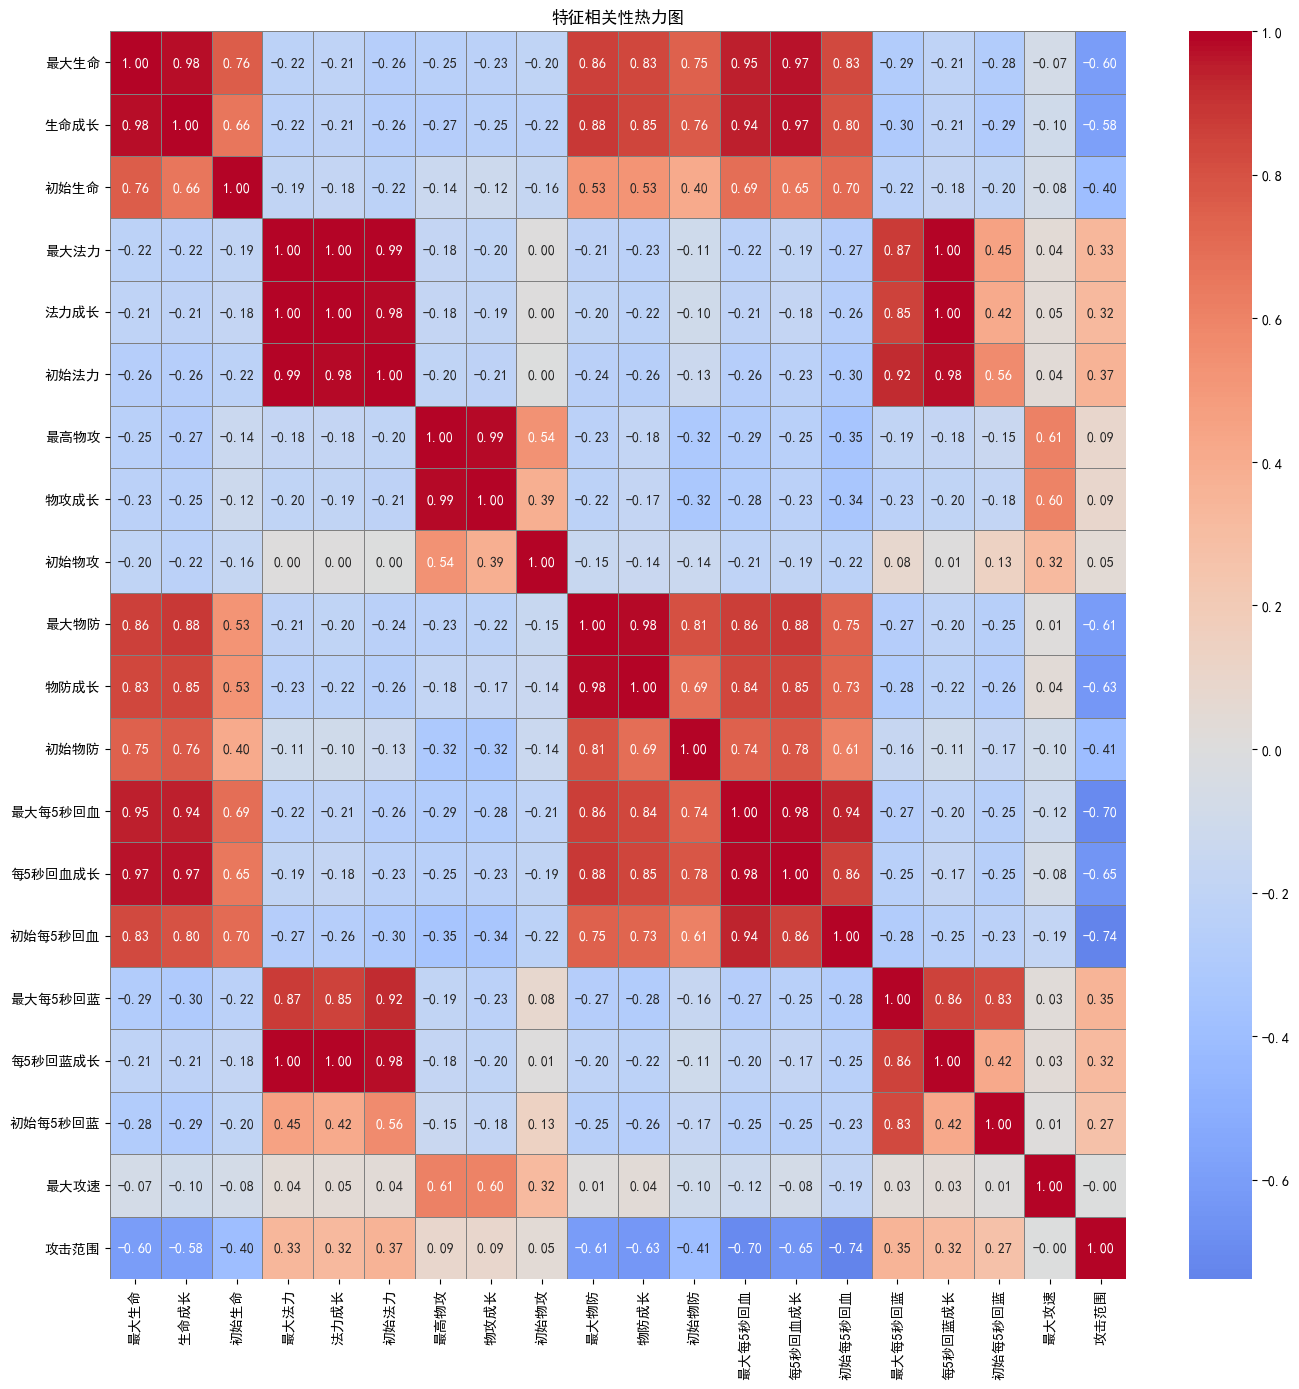

In [26]:
# repeat, EM是个框架！！！底下还有具体算法 eg. GMM, HMM. 这里用GMM/高斯混合模型
# in this model, **the estimated "parameters" are the means and covariances of the Gaussian distributions**

# same as K-Means, you have to specify the number of clusters assigned. 
# the default here is 1, meaning all predicted values will be the same if you didn't specify～～

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import pandas as pd   # 除了read_csv()函数还有DataFrame对象的.to_csv()方法; 
                      # 同理，对于中文的话最好都指明gb18030编码，这个是国内标准处理各种中文字符最好用的
import matplotlib.pyplot as plt
import seaborn as sns
#数据探索 （其中的“定位”两列其实就已经聚好类了，我们在feature里面不要它。。。）
dataset = pd.read_csv("L29上课数据.csv",encoding="gb18030")
# print(dataset.head(),"\n",dataset.info(),"\n",dataset.describe())

# 数据清洗，这步可以跳过
# 特征选择,这一步继续通过correlation heatmap visualize; 其中的“定位”两列不能要
# 名字啥的非数值类的也都不要）反正聚类完还要把labels结果贴回原表。

# features0 = dataset.select_dtypes(exclude=['object'])  
# 除了select_dtypes()一步到位，还可以用的有：.columns[df.dtypes != 'object'] (布尔索引，通过True/False过滤只留True的)
# 但是保留的列中还残留有用的字符串信息和特殊符号%。。。就得单独处理
features0 = dataset[dataset.columns[1:-2]]
features0['最大攻速'] = features0['最大攻速'].apply(lambda x: float(x.strip('%'))/100)
features0['攻击范围'] = features0['攻击范围'].map({'远程':1,'近战':0})
# 设置plt正确显示中文
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

plt.figure(figsize=(14,14))
sns.heatmap(features0.corr(),annot=True,fmt=".2f", cmap='coolwarm', 
            center=0, linewidths=0.5, linecolor='gray')
plt.title("特征相关性热力图")
plt.tight_layout()  # 防止标签重叠
plt.show()


In [28]:
# 虽然完全不懂后面那些回蓝特征什么意思
features1 = features0[['最大生命','初始生命','最大法力','最高物攻','初始物攻', '最大物防', '初始物防', '最大每5秒回血', '最大每5秒回蓝', '初始每5秒回蓝', '最大攻速', '攻击范围']]
scaler = StandardScaler()
data = scaler.fit_transform(features1)
gmm = GaussianMixture(n_components=30,covariance_type='full')
prediction = gmm.fit_predict(data)
print(prediction[:10])
dataset.insert(0,'分组',prediction)
dataset.to_csv('./L29输出数据.csv',index=False,sep=',',encoding='gb18030')

# 聚类结果评估
from sklearn.metrics import calinski_harabasz_score
print("聚30个类时，评估分数为:",calinski_harabasz_score(data,prediction),"\n")

# 上面那个是聚三十个类，试试三个时的评估结果，以及用全部矩阵特征值的结果
gmm2 = GaussianMixture(n_components=3,covariance_type='full')
prediction2 = gmm2.fit_predict(data)
print(prediction2[:10])
print("聚3个类时，评估分数为:",calinski_harabasz_score(data,prediction2))

ss2 = StandardScaler()
data2 = ss2.fit_transform(features0) # 使用全部特征值矩阵，不根据相关性结果进行特征选择
gmm3 = GaussianMixture(n_components=30,covariance_type='full')
pred3 = gmm3.fit_predict(data2)
print(pred3[:10])
print("聚30个类但是使用全部特征矩阵时，评估分数为:",calinski_harabasz_score(data,pred3))


[18  5  8 15  2  2 14  8 15  5]
聚30个类时，评估分数为: 21.647032745477087 

[1 1 2 2 2 2 0 2 2 2]
聚3个类时，评估分数为: 21.064787509224644
[20  9 10 11 28 19 15 10  2 24]
聚30个类但是使用全部特征矩阵时，评估分数为: 17.8578936043899
